# NLTK Chapter 4

## Writing Structured Programs

*The html version of this chapter is available [here](https://www.nltk.org/book/ch04.html "ch04").*

### 4.1 Back to the Basics

#### Assignment

*__Your Turn__: Use multiplication to create a list of lists: `nested = [[]] * 3`. Now modify one of the elements of the list, and observe that all the elements are changed. Use Python's `id()` function to find out the numerical identifier for any object, and verify that `id(nested[0])`, `id(nested[1])`, and `id(nested[2])` are all the same.*



In [6]:
nested = [[]] * 3
[id(nested[i]) == id(nested[j]) for i, j  in zip([0, 0, 1], [1, 2, 2])]

[True, True, True]

*__N.B.:__ To copy a structure w/o copying the object references, use `copy.deepcopy()`.*

In [8]:
import copy

test = [1, 2, 3]
test2 = copy.deepcopy(test)

In [9]:
test[0] = 'foo'

print(test, test2)

['foo', 2, 3] [1, 2, 3]


#### Equality

*Objects can have the same value (verifiable by `==`), but have different references (verifiable by `is`):*

In [12]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [13]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [14]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [15]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [16]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

*Use `id` to see which object has a different reference:*

In [17]:
[id(snake) for snake in snake_nest]

[1739372726600, 1739372726600, 1739387617480, 1739372726600, 1739372726600]

#### Conditionals

*Empty strings or lists are also evaluated as false:*

In [20]:
mixed = ['cat', '', ['dog'], []]

for element in mixed:
    if element:
        print(element)

cat
['dog']


### 4.2 Sequences

#### Operating on Sequence Types

| Python Expression                  | Comment                                 |
|:-----------------------------------|:----------------------------------------|
| `for item in s`                    | iterate over the items of `s`           |
| `for item in sorted(s)`            | iterate over the items of `s` in order  |
| `for item in set(s)`               | iterate over unique elements of `s`     |
| `for item in reversed(s)`          | iterate over elements of `s` in reverse |
| `for item in set(s).difference(t)` | iterate over elements of `s` not in `t` |
|                                    |                                         |
|                                    |                                         |
|                                    |                                         |

*Other objects (e.g., a `FreqDist`) can be converted into a sequence, from where we can use iteration.  E.g.:*

In [24]:
import nltk
from nltk import word_tokenize

In [27]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [30]:
for key in fdist:
    print(key + ':', fdist[key], end = '; ') 

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

*Using tuples to re-arrange the contents of our list:*

In [31]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

*Examples of `zip` and `enumerate`:*

In [32]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [34]:
print(list(zip(words, tags)))

[('I', 'noun'), ('turned', 'verb'), ('off', 'prep'), ('the', 'det'), ('spectroroute', 'noun')]


In [35]:
print(list(enumerate(words)))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]


*Another example: Dividing a set into training and test sets:*

In [36]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [37]:
len(training_data) / len(test_data)

9.0

#### Combining Different Sequence Types

*We can use the above methods together to sort the words in a string by length.  The `_` is a convention for a variable whose values won't be used:*

In [38]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

*__N.B.:__ In tuples the ordering is very important, as operations (e.g., sorting) are performed on the first item in the tuple.*

*__Your Turn:__ Convert `lexicon` to a tuple, using `lexicon = tuple(lexicon)`, then try each of the above operations, to confirm that none of them is permitted on tuples.*

In [42]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]
lexicon = tuple(lexicon)
lexicon

(('the', 'det', ['Di:', 'D@']), ('off', 'prep', ['Qf', 'O:f']))

*`sort` won't work.  As with earlier chapters, I'm not going to include non-functioning code in the notebook cells, and will instead include it as markdown:*

```
lexicon.sort()
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-43-f0ef1dd8cf20> in <module>
----> 1 lexicon.sort()

AttributeError: 'tuple' object has no attribute 'sort'
```

*Ditto with item assignment:*

```
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-44-e4e3a95fe95b> in <module>
----> 1 lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])

TypeError: 'tuple' object does not support item assignment
```

*And also item deletion:*

```
del lexicon[0]
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-45-0ba66aa11bf3> in <module>
----> 1 del lexicon[0]

TypeError: 'tuple' object doesn't support item deletion
```

#### Generator Expressions

*Example of tokenizing and normalizing a text:*

In [47]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
          "it means just what I choose it to mean - neither more nor less."'''
print([w.lower() for w in word_tokenize(text)])

['``', 'when', 'i', 'use', 'a', 'word', ',', "''", 'humpty', 'dumpty', 'said', 'in', 'rather', 'a', 'scornful', 'tone', ',', '``', 'it', 'means', 'just', 'what', 'i', 'choose', 'it', 'to', 'mean', '-', 'neither', 'more', 'nor', 'less', '.', "''"]


*In the two following expressions, the second one is faster, especially if the text is very large:*

In [48]:
max([w.lower() for w in word_tokenize(text)])

'word'

In [49]:
max(w.lower() for w in word_tokenize(text))

'word'

### 4.3 Questions of Style

#### Python Coding Style

*Coding style guide is [here](https://www.python.org/dev/peps/pep-0008/ "style guide").*

#### Procedural vs. Declarative Style

*The examples are too long to copy.  The upshot: __Procedural style__ is very close to machine language - not very concise.  __Declarative style__ is higher level, with operations happening behid the scenes.  Declarative style often uses list comprehensions and is faster; but procedural style may be easier to understand and debug.

#### Some Legitimate Uses for Counters

*We could use a nested list comprehension to build a $m$ by $n$ array:*

In [50]:
import pprint

m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


*This would not work with multiplication:*

In [51]:
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


### 4.4 Functions: The Foundation of Structured Programming

#### Function Inputs and Outputs

*__No notes.__*

#### Parameter Passing

*__No notes.__*

#### Variable Scope

*Because careful using the `global` declaration.*

#### Checking Parameter Types

*Use `assert isinstance(var, type), "warning"` to deal with incorrect parameter types being passed to a function.*

#### Functional Decomposition

*__No notes.__*

#### Documenting Functions

*Cf. [here](http://www.python.org/dev/peps/pep-0257/ "docstring conventions") for more information on docstring conventions.*

*NLTK uses Sphinx markup language to document parameters.  Sphinx can be automatically converted into API documentation.  I __have__ seen this used, but I wouldn't really say that it's that common.  For shits and giggles, I'll copy and paste a function from the book that uses Sphinx:*

In [52]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

### 4.5 Doing More with Functions

#### Functions as Arguments

*I found this section to be really poorly written.  For one thing, it uses a function - `extract_property` - that will only work on one specific list.  If this isn't an example of a bad function, I don't know what is, and I find it especially vexing that this is in a chapter dedicated to writing efficient and logical code.*

*Another problem I have is that it very cursorily introduces __lambda  expressions__, which need a much more thorough explanation.*

*Finally, the example in this section uses `cmp()`, which has been removed from Python 3.*

#### Accumulative Functions

*Here are two examples of accumulative functions.  The second is more efficient, since it uses a generator:*

In [66]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result
    
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [68]:
import time

start = time.time()

for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end = " ")
    
end = time.time()

print("\n\nElapsed time is:", end - start)

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [69]:
start = time.time()

for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end = " ")
    
end = time.time()

print("\n\nElapsed time is:", end - start)

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

*Although the second function was supposed to be more efficient, it actually takes slightly more time to run.*

*Here's an example of a recurisve function.  Recursive functions are more difficult to follow, and this one is no exception.  I'm also not sure why they introduced recursive functions here when they make no effort to explain what they are or how they work.*

In [78]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm) + 1):
                yield perm[:i] + seq[0:1] + perm[i:]

In [79]:
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

#### Higher-Order Functions

*`filter` applies a function and only returns items whose value is `True`:*

In [80]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

*This would be the corresponding list comprehension:*

In [81]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

*`map` applies a function to every item in a sequence:*

In [82]:
lengths = list(map(len, nltk.corpus.brown.sents(categories = 'news')))
sum(lengths) / len(lengths)

21.75081116158339

*The corresponding list comprehension:*

In [83]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories = 'news')]
sum(lengths) / len(lengths)

21.75081116158339

*Here are two examples where we count the number of vowels in each word in `sent`.  Note that the line comprehension is much easier to follow than the lambda expression.  Also note that I had to add `list` - which was missing in the book - to get this to work:*

In [89]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [88]:
[len(list(c for c in w if c.lower() in "aeiou")) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

#### Named Arguments

<i>__Keyword arguments__ are arguments that are defined when we call the function, using syntax like this: `sample_function(new_arg = "this value")`.  They are usually abbreviated as `kwargs` inside functions, as opposed to `args`. The `*` before `args` means the number of possible arguments is not specified - i.e., we can use as many arguments as we'd like.  The corresponding syntax for keyword arguments is `**kwargs`:</i>

In [90]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)
    
generic(1, "African swallow", monty = "python")

(1, 'African swallow')
{'monty': 'python'}


### 4.6 Program Development

#### Structure of a Python Module

*To find the location of a file on the hard drive, add `__file__` to the file's name.  __N.B.:__ The example used in the book - `nltk.metrics.distance.__file__` can not seem to be found, but by navigating through the folders I was able to find it.  Not sure why it's not turning up when I try to call it from the jupyter notebook...*

In [103]:
nltk.metrics.__file__

'C:\\Users\\mjcor\\Anaconda3\\lib\\site-packages\\nltk\\translate\\metrics.py'

In [ ]:
C:\Users\mjcor\Anaconda3\lib\site-packages\nltk\translate\metrics.py

*__N.B.:__ variables and functions only used within a certain module have names beginning with an underscore.  If another module imports the module in question, these variables and functions will not be imported.*

#### Multi-Module Programs

*__No notes.__*

#### Sources of Error

*__No notes.__*

#### Debugging Techniques

*Python has a __debugger__ (`pdb`) which can help us monitor what's happening inside a program.*

*Below is an example of a function that has some behavior which is most likely unwanted:*

In [108]:
def find_words(text, wordlength, result = []):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

In [109]:
import pdb

find_words(['cat'], 3)

['cat']

*`pdb` generates a prompt, meaning that I'll have difficulties when I later run all the cells in this notebook, so I'll run it once now and include the traceback as markdown.*

*Commands with `pdb`:*

 *`help`: full list of commands

 *`step` (or just `s`): will execute the current line and stop. 
If the current line calls a function, it will enter the function and stop at the first line. 

 *`next` (or just `n`): is similar, but it stops execution at the next line in the current function. 

 *`break` (or `b`): can be used to create or list breakpoints. 

 *`continue` (or `c`): continue execution as far as the next breakpoint. 

Type the name of any variable to inspect its value.



```
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) s
--Call--
> <ipython-input-108-fd1321c8447a>(1)find_words()
-> def find_words(text, wordlength, result = []):
(Pdb) s
> <ipython-input-108-fd1321c8447a>(2)find_words()
-> for word in text:
(Pdb) s
> <ipython-input-108-fd1321c8447a>(3)find_words()
-> if len(word) == wordlength:
(Pdb) s
> <ipython-input-108-fd1321c8447a>(4)find_words()
-> result.append(word)
(Pdb) s
> <ipython-input-108-fd1321c8447a>(2)find_words()
-> for word in text:
(Pdb) s
> <ipython-input-108-fd1321c8447a>(5)find_words()
-> return result
(Pdb) s
--Return--
> <ipython-input-108-fd1321c8447a>(5)find_words()->['cat', 'dog']
-> return result
(Pdb) s
--Return--
> <string>(1)<module>()->None
(Pdb) s
> c:\users\mjcor\anaconda3\lib\bdb.py(589)run()
-> self.quitting = True
(Pdb) s

```

#### Defensive Programming

*__Regression testing__ is using a suite of test cases to detect situations where a change to the code has an unintended side-effect of breaking something.  The [`doctest` documentation](http://docs.python.org/library/doctest.html "doctest") has more information.*

### 4.7 Algorithm Design

#### Recursion

*Here's a recursive program to determine the size of a WordNet hyponym hierarchy (the book says 'hypernym', but examining the code shows that it's clearly the 'hyponym' hierarchy that's being investigated):*

In [113]:
from nltk.corpus import wordnet as wn

def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [142]:
dog = wn.synset('dog.n.01')
size1(dog)

190

*Here is an iterative program that does the same thing.  The authors attest that the recursive is easier to interpret, but I feel this is a matter of opinion.  And as the authors mention a bit later, recursion in python is usually slower than iteration.*

In [117]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [143]:
dog = wn.synset('dog.n.01')
size2(dog)

190

*Here's another example of a recursion: a program that builds a __letter trie__:*

In [1]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [2]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')

trie = dict(trie)

trie['c']['h']['a']['t']['value']

'cat'

In [5]:
pprint.pprint(trie, width = 40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


#### Space-Time Tradeoffs

*Functions can run faster if they don't have to build up a data structure every time they're run; i.e., lookup is faster than having to recreate the values.*

*The function below finds occurrences of words in the Movie Reviews Corpus and prints these occurrences in context.  The function requires user input, so I'm not going to run it from within this notebook. I will instead just run it once and include the output as markdown:*


In [2]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' ' * 30 + raw(doc) + ' ' * 30
    pos = text.index(term)
    return text[pos - 30:pos + 30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())




Building Index...


```
query = ''
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")
        
        
query> working
oon learns that montgomery is working for dr . moreau , who 
ded by her mother . lucy quit working professionally 10 year
 the best cinematic thespians working today , looks suitably
nd the mechanic . okay , he's working from a book , so maybe
ated hands and klingon extras working the star trek conventi
mes bondish type secret agent working for the u . n . after 
electrical equipment is oddly working by itself . one surviv
ed his ho and turned square , working to support his wife an
-molecular research scientist working for the military , you
as a couple good moments ) is working on new year's eve for 
.
.
.
```

*Sets are also (supposedly) faster than lists.  The code below uses `timeit.Timer` to time 1000 iterations of function calls.  Note that `timeit.Timer` uses strings as arguments:*

In [42]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range({})".format(vocab_size)
setup_set =  "import random; vocab = set(range({}))".format(vocab_size)
statement =  "random.randint(0, {}) in vocab".format(vocab_size * 2)


*In the experiment in the book, sets are over 700 times faster than lists.  However, replicating the same experiment on my machine produces far different results.  The relative times are nearly the same, and in some instances lists are actually faster than sets:*

In [18]:
for i in range(1, 6):
    print("\nAttempt No. {}\n".format(i))

    print("lists:\t", end = '')
    print(Timer(statement, setup_list).timeit(1000))
    print("sets:\t", end = '')
    print(Timer(statement, setup_set).timeit(1000))


Attempt No. 1

lists:	0.0018133000000943866
sets:	0.0014407000001028791

Attempt No. 2

lists:	0.0014467999999396852
sets:	0.0030965000000833243

Attempt No. 3

lists:	0.0030446000000665663
sets:	0.0012758999998823128

Attempt No. 4

lists:	0.001927300000033938
sets:	0.001275300000088464

Attempt No. 5

lists:	0.001496800000040821
sets:	0.0011382999998659216


#### Dynamic Programming

*__Dynamic programming__ involves retrieving solutions from a lookup table instead of computing them repeatedly.*

*The example in the book involves Sanskrit prosody (esoteric enough?) and shows four ways of computing the same results: 1) recursive programming; 2) bottom-up dynamic programming; 3) top-down dynamic programming; and 4) built-in memoization.*

*Recursive programming might end up computing the same values multiple times, which can be a huge problem as the size of the recursion tree grows.*

*__Bottom-up dynamic programming__ involves solving sub-problems first; but this can be wasteful as it may solve some sub-problems that are not required to solve the main problem.*

*__Top-down dynamic programming__ is recursive and checks to see if the solution to the problem has already been stored.  If so, it just recalls it; if not, it calculates the solution and stores it.*

*__Memoization__ is similar to top-down dynamic programming, but uses a Python "decorator" called `memoize`, which wasn't really presented in any detail.*

In [47]:
def virahanka1(n):
    if n == 0:
        return[""]
    elif n == 1:
        return["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l
    
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i + 1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup = {0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]


from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return[""]
    elif n == 1:
        return["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l


In [49]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [21]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [24]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [28]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

*As an experiment I decided to time the operation of all four functions for a meter of length 30 (running the first function with anything longer than 30 will cause the system to crash).  I tried to use `Timer` from above, but found it to be very finnicky, so I went back to the old standby of `time.time()`:*

In [62]:
vh = [virahanka1, virahanka2, virahanka3, virahanka4]

for i in range(len(vh)):
    print("virahanka{} run time for meter of length 30:\n".format(i + 1))
    start = time.time()
    vh[i](30)
    end = time.time()
    print("\telapsed time: {}\n".format(end - start))

virahanka1 run time for meter of length 30:

	elapsed time: 3.778897523880005

virahanka2 run time for meter of length 30:

	elapsed time: 0.590421199798584

virahanka3 run time for meter of length 30:

	elapsed time: 0.0

virahanka4 run time for meter of length 30:

	elapsed time: 0.0



*The times are basically what I had expected them to be.*

### 4.8 A Sample of Python Libraries

#### Matplotlib

*I have used Matplotlib extensively in the past, so I'm not going to bother with the example in the book.*

#### NetworkX

*I'm not at all familiar with NetworkX, so I wouldn't be able to make my own functions that would create something similar to the graph in figure 4.15 of the book.*

*Also, the function `draw_graphviz` has been removed from NetworkX, so I'm using `nx.draw` instead.  The resulting graph is somewhat different.*

In [79]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) 
        traverse(graph, start, child) 

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    
    # nx.draw_graphviz is deprecated in NetworkX 2.0~
    # using nx.draw instead
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [71]:
%matplotlib inline

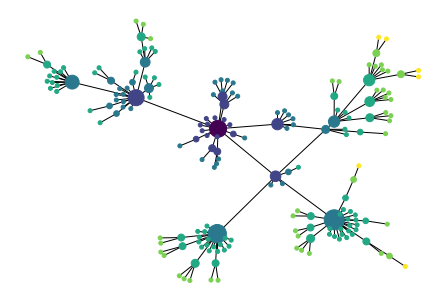

In [80]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

#### CSV

*I'm also quite familiar with importing CSV files, so I'm not going to bother with the code from the book, which wouldn't work anyway, since I don't have the file `lexicon.csv`.*

#### NumPy

*I've also used NumPy quite a bit in the past, which is good, since the introduction given in the book is far from illustrative.*

### 4.9 Summary 

*__No notes.__*

### 4.10 Further Reading

*__No notes.__*

